In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def sdot2(s,t,params):
    ML, PL, MT, PT = s
    km0L, kmL, KL, nL, kdmL, kpL, kdpL, km0T, kmT, KT, nT, kdmT, kpT, kdpT = params

    rate_ML_prod = km0L + kmL*(KT/(PT+KT))
    rate_ML_loss = kdmL*ML

    rate_PL_prod =  kpL*ML
    rate_PL_loss =  kdpL*PL

    rate_MT_prod = km0T + kmT*(KL/(PL+KL))
    rate_MT_loss = kdmT*MT

    rate_PT_prod = kpT*MT
    rate_PT_loss = kdpT*PT
        
    dML = rate_ML_prod - rate_ML_loss
    dPL = rate_PL_prod - rate_PL_loss
    
    dMT = rate_MT_prod - rate_MT_loss
    dPT = rate_PT_prod - rate_PT_loss
    
    ds = [dML, dPL, dMT, dPT]
    return ds

# define parameter values
km0L = 0.01
kmL = 5
KL = 500
nL = 2
kdmL = 0.1386 
kpL = 1.2
kdpL = 0.0165

km0T = 0.01
kmT = 5
KT = 500
nT = 2
kdmT = 0.1386 
kpT = 1.2
kdpT = 0.0165

params = [km0L, kmL, KL, nL, kdmL, kpL, kdpL,
          km0T, kmT, KT, nT, kdmT, kpT, kdpT]

# define initial conditions
ML0 = 0
PL0 = 0
MT0 = 36
PT0 = 2600

s0 = [ML0, PL0, MT0, PT0]

# define time observation points
t_start = 0
t_end = 1000

t_obs = np.arange(t_start, t_end+0.1, 1)

# run simulation
s_obs = odeint(sdot2, s0, t_obs, args=(params,))

# extract the observations
ML_obs = s_obs[:,0]
PL_obs = s_obs[:,1]
MT_obs = s_obs[:,2]
PT_obs = s_obs[:,3]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


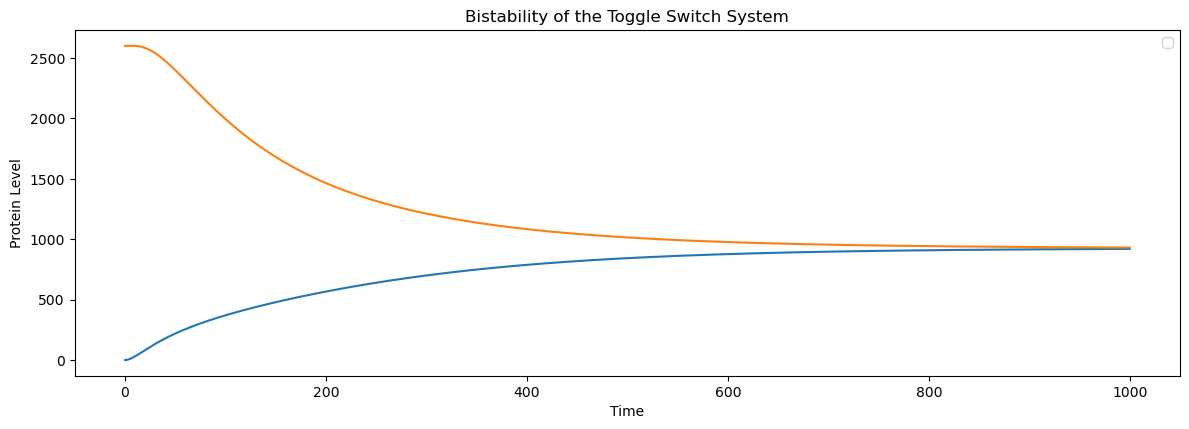

In [5]:
plt.figure(figsize=(12, 8))

# Plot protein levels
plt.subplot(2, 1, 2)
plt.plot(t_obs, PL_obs)
plt.plot(t_obs, PT_obs)
plt.xlabel('Time')
plt.ylabel('Protein Level')
plt.title('Bistability of the Toggle Switch System')
plt.legend()

plt.tight_layout()
plt.show()